Name: Payam Taebi        
Student ID: 400104867

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

**Part 1**

 Write two functions named "camera_matrix" and "camera_projection". The first one gets all the camera parameters, containing λ, f (focal length), Sx, Sy, Sθ, Ox, Oy, R, T, and returns the camera matrix (Please provide comments above each stage of transformation). The second function projects a given 3D point on image and returns a 2D point in pixel coordinates.

In [2]:
def camera_matrix(λ, f, Sx, Sy, Sθ, Ox, Oy, R, T):
    """
    Compute the camera matrix given camera parameters

    Parameters:
    λ (float): Scaling factor
    f (float): Focal length
    Sx (float): Horizontal sensor size
    Sy (float): Vertical sensor size
    Sθ (float): Skew parameter
    Ox (float): Principal point offset in x direction
    Oy (float): Principal point offset in y direction
    R (3x3 array): Rotation matrix
    T (3x1 array): Translation vector

    Returns:
    P (3x4 array): Camera matrix
    """

    # Intrinsic parameters matrix
    K = np.array([[λ*f, Sθ, Ox],
                  [0, λ*f, Oy],
                  [0, 0, 1]])

    # Extrinsic parameters matrix
    RT = np.hstack((R, T))

    # Camera matrix
    P = K @ RT

    return P

def camera_projection(X, Y, Z, matrix):
    # Convert the input 3D point to homogeneous coordinates
    point_3d = np.array([X, Y, Z, 1])

    # Perform the camera projection by multiplying the camera matrix with the 3D point
    projected_point = np.dot(matrix, point_3d)
    
    #convert matrix to array
    projected_point = np.squeeze(np.asarray(projected_point))

    # Normalize the projected point by dividing by the last element
    normalized_projected_point = projected_point / projected_point[2]

    # Extract the x and y pixel coordinates from the normalized projected point
    x = normalized_projected_point[0]
    y = normalized_projected_point[1]

    return x, y

**Part 2**

Consider a pinhole camera with center located at (1, 1, -3), which its focal length is 100, scale factors (Sx, Sy) are both 1 and pixel coordinates of principal point is (50, 50). Also skew parameter is zero. The angle of the camera is such that the optical axis of the camera is parallel to the z axis. Using the previous function obtain the whole camera matrix.

In [3]:
landa = 1
R = np.identity(3)
T = np.matrix([[-1], [-1], [3]])
f = 100
Sx = 1
Sy = 1 
S_theta = 0
Ox = 50
Oy = 50
matrix = camera_matrix(landa, f, Sx, Sy, S_theta, Ox, Oy, R, T)
print(matrix)

[[100.   0.  50.  50.]
 [  0. 100.  50.  50.]
 [  0.   0.   1.   3.]]


**Part 3**

Suppose that vector V: (0, 1, 1) is located at (1, 1, 3) in 3D space. Apply the obtained camera matrix to V. Plot the result in pixel coordinates in a 2D plot. From which step of projection the length of the vector changes?

Obviously, the length of the vector changes due to scale factors, meaning that we do not have any changes in shift and rotation. But after being multiplied by the focal distance, the length of the vector changes, and then the transformations are projective and affine, and do not preserve size.

In [4]:
def create_points(v,p,count,matrix):
    x_res =  []
    y_res = []
    if count <= 0 :
        return x_res,y_res
    end_p = p
    for i in range(count):
        x,y = camera_projection(end_p[0], end_p[1], end_p[2], matrix)
        end_p = p + v * (i+1)
        x_res.append(x)
        y_res.append(y)
    return x_res,y_res

def show_details(x_res,y_res):
    n = len(x_res)
    plt.scatter(x_res, y_res, color='blue', label='Points')
    plt.plot(x_res, y_res, linestyle="--", color='red', label='Line') 
    plt.title('we use '+ str(n) + ' points to create this line')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()
    
def run(v,p,count,matrix):
    a,b = create_points(v,p,count,matrix)
    show_details(a,b)

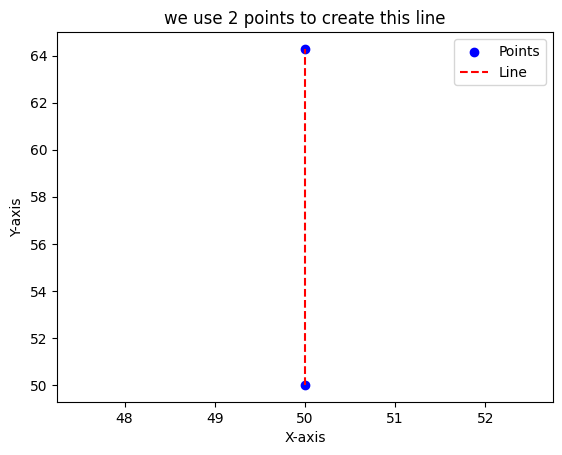

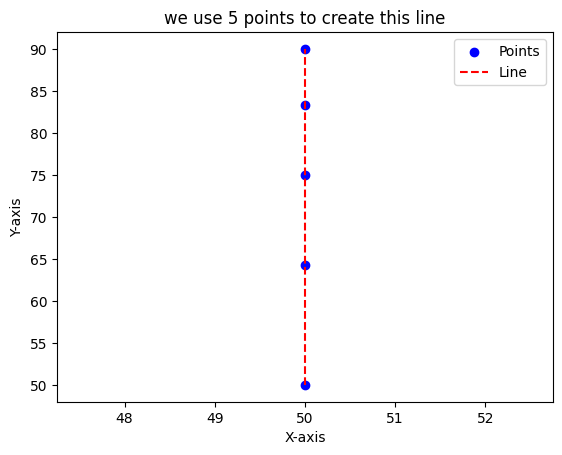

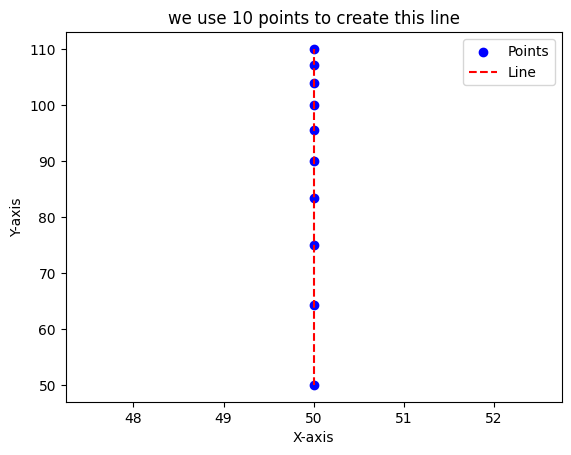

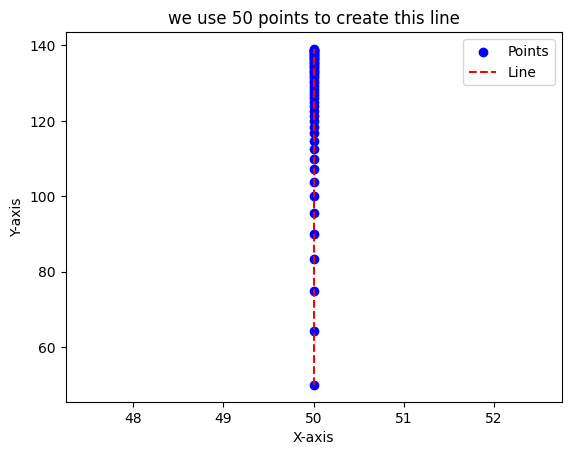

all lines are the same.


In [5]:
vector_V = np.array([0, 1, 1])
start_p = np.array([1, 1, 3])



run(vector_V,start_p,2,matrix)
run(vector_V,start_p,5,matrix)
run(vector_V,start_p,10,matrix)
run(vector_V,start_p,50,matrix)
print("all lines are the same.")

**Part 4**

If the camera is rotated by +25 degrees around x axis, how would R and T change? What would the final image be?

In [6]:
# T does not change
R = np.matrix([[1, 0, 0],
              [0, math.cos(np.pi/180*25), -math.sin(np.pi/180*25)],
              [0, math.sin(np.pi/180*25), math.cos(np.pi/180*25)]])
matrix = camera_matrix(landa, f, Sx, Sy, S_theta, Ox, Oy, R, T)
print("new camera matrix is :\n",matrix)

new camera matrix is :
 [[100.          21.13091309  45.31538935  50.        ]
 [  0.         111.76169179   3.05356318  50.        ]
 [  0.           0.42261826   0.90630779   3.        ]]


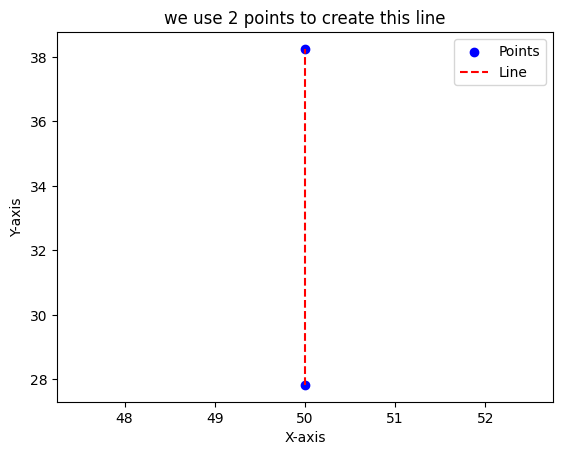

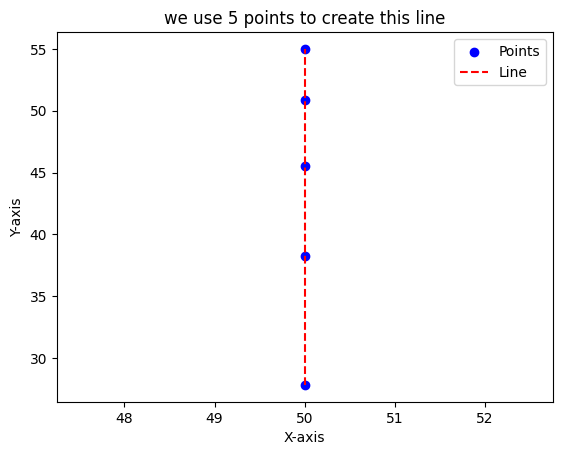

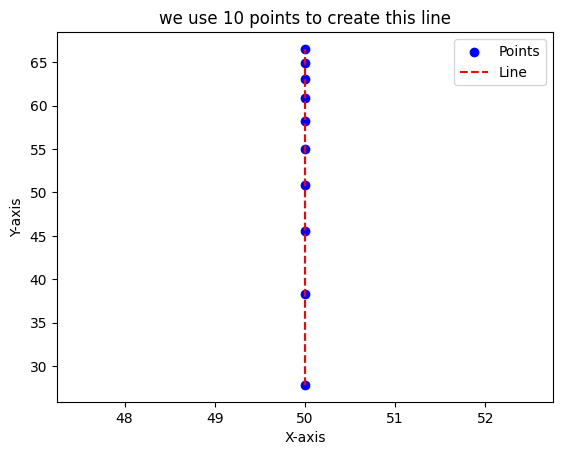

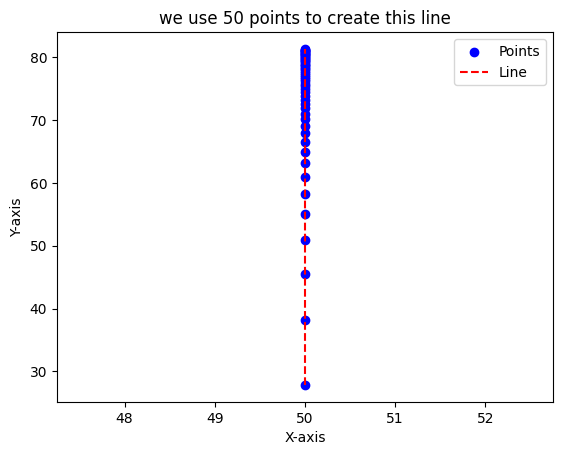

all lines are the same.


In [7]:
vector_V = np.array([0, 1, 1])
start_p = np.array([1, 1, 3])

run(vector_V,start_p,2,matrix)
run(vector_V,start_p,5,matrix)
run(vector_V,start_p,10,matrix)
run(vector_V,start_p,50,matrix)
print("all lines are the same.")